# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [78]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('previsao_de_renda.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [7]:
modelo = 'renda ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia'
y, X = patsy.dmatrices(modelo, data=df, return_type='dataframe')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
X

,Intercept,C(sexo)[T.M],posse_de_veiculo[T.True],posse_de_imovel[T.True],C(tipo_renda)[T.Bolsista],C(tipo_renda)[T.Empresário],C(tipo_renda)[T.Pensionista],C(tipo_renda)[T.Servidor público],C(educacao)[T.Pós graduação],C(educacao)[T.Secundário],...,C(estado_civil)[T.Viúvo],C(tipo_residencia)[T.Casa],C(tipo_residencia)[T.Com os pais],C(tipo_residencia)[T.Comunitário],C(tipo_residencia)[T.Estúdio],C(tipo_residencia)[T.Governamental],qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26.0,6.602740,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,28.0,7.183562,2.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,0.838356,2.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,30.0,4.846575,3.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,33.0,4.293151,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,32.0,9.849315,2.0
14995,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,48.0,13.887671,1.0
14997,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,45.0,7.832877,2.0
14998,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36.0,4.298630,2.0


Valor de R2 para alpha igual a 0 : 0.29796640176910283
Valor de R2 para alpha igual a 0.001 : 0.2979664666220778
Valor de R2 para alpha igual a 0.005 : 0.2979667258970612
Valor de R2 para alpha igual a 0.01 : 0.29796704968324417
Valor de R2 para alpha igual a 0.05 : 0.2979696277710633
Valor de R2 para alpha igual a 0.1 : 0.29797282035425054


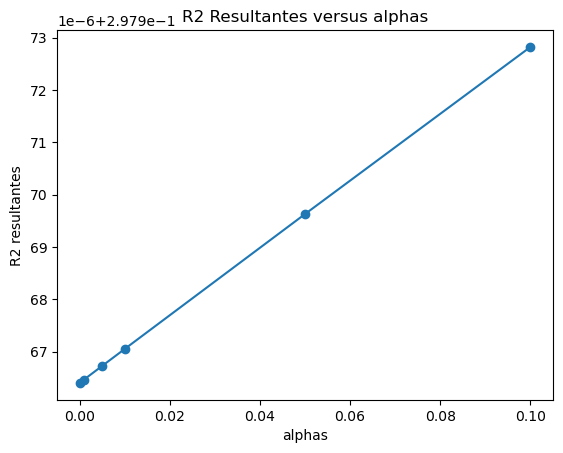

In [9]:
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
r2_resultantes = []

for alpha in alphas:
    ridge_model=Ridge(alpha=alpha)
    ridge_model.fit(X_train,y_train)

    y_pred=ridge_model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    r2_resultantes.append(r2)
    print(f"Valor de R2 para alpha igual a {alpha} : {r2}")

plt.plot(alphas,r2_resultantes,marker='o',linestyle='-')
plt.title("R2 Resultantes versus alphas")
plt.xlabel("alphas")
plt.ylabel("R2 resultantes")
plt.show()

Para este caso, quanto menor o valor de alpha, menor o valor do coeficiente de determinacao, de forma que o aumento de alpha aumenta este coeficiente de forma linear, porem numa diferenca muito pequena entre o menor e o maior valor.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.036e+11, tolerance: 8.060e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

Valor de R2 para alpha igual a 0 : 0.2979668544387346


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.908e+11, tolerance: 8.060e+07
  model = cd_fast.enet_coordinate_descent(


Valor de R2 para alpha igual a 0.001 : 0.29796732277878024


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 8.060e+07
  model = cd_fast.enet_coordinate_descent(


Valor de R2 para alpha igual a 0.005 : 0.2979691934998303


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.038e+11, tolerance: 8.060e+07
  model = cd_fast.enet_coordinate_descent(


Valor de R2 para alpha igual a 0.01 : 0.29797152596309506


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.563e+10, tolerance: 8.060e+07
  model = cd_fast.enet_coordinate_descent(


Valor de R2 para alpha igual a 0.05 : 0.2979899481473126
Valor de R2 para alpha igual a 0.1 : 0.29801238207281067


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.573e+10, tolerance: 8.060e+07
  model = cd_fast.enet_coordinate_descent(


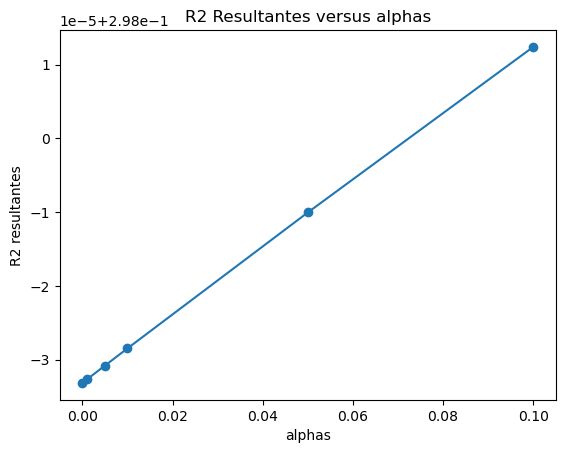

In [11]:
r2_resultantes_lasso = []

for alpha in alphas:
    lasso_model=Lasso(alpha=alpha)
    lasso_model.fit(X_train,y_train)

    y_pred=lasso_model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    r2_resultantes_lasso.append(r2)
    print(f"Valor de R2 para alpha igual a {alpha} : {r2}")

plt.plot(alphas,r2_resultantes_lasso,marker='o',linestyle='-')
plt.title("R2 Resultantes versus alphas")
plt.xlabel("alphas")
plt.ylabel("R2 resultantes")
plt.show()

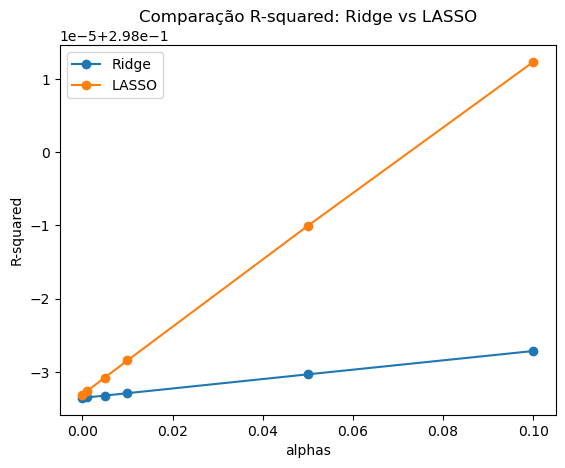

In [12]:
plt.plot(alphas, r2_resultantes, marker='o', linestyle='-', label='Ridge')
plt.plot(alphas, r2_resultantes_lasso, marker='o', linestyle='-', label='LASSO')
plt.title("Comparação R-squared: Ridge vs LASSO")
plt.xlabel("alphas")
plt.ylabel("R-squared")
plt.legend()
plt.show()

Ao compararmos as duas abordagens, vimos que o valor de R2 apresenta maiores resultados para o metodo Lasso de regularizacao.

In [14]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # Estatísticas para adição de novas variáveis
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # Estatísticas para remoção de variáveis existentes
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]  # Todas as pvalores exceto para o intercepto
        worst_pval = pvalues.max()  # Pior p-valor na regressão
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X_train, y_train)

model = sm.OLS(y_train, sm.add_constant(X_train[result])).fit()

y_pred = model.predict(sm.add_constant(X_test[result]))
r2 = r2_score(y_test, y_pred)
print(f'R² na base de testes: {r2}')

Add  tempo_emprego                  with p-value 0.0
Add  C(sexo)[T.M]                   with p-value 1.26513e-242
Add  C(tipo_renda)[T.Empresário]    with p-value 4.12304e-06
Add  Intercept                      with p-value 1.78329e-07
Add  idade                          with p-value 2.37794e-05
Add  C(educacao)[T.Superior completo] with p-value 0.00080423
R² na base de testes: 0.2968993711320598


Considerando que para a regularizacao por Ridge e Lasso, seus valores maximos de R2 sao iguais a 0.29797282035425054 e 0.29801238207281067, respectivamente, temos que ainda assim estas duas abordagens se mostram mais confiaveis que o uso de stepwise, cujo R2 na base de testes retornou um valor igual a 0.296899371132058

In [16]:
modelo = 'renda ~ C(sexo) + C(tipo_renda) + C(educacao) + idade + tempo_emprego'
y, X = patsy.dmatrices(modelo, data=df, return_type='dataframe')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Valor de R2 para alpha igual a 0 : 0.29708276217912744
Valor de R2 para alpha igual a 0.001 : 0.29708277178960407
Valor de R2 para alpha igual a 0.005 : 0.2970828101804418
Valor de R2 para alpha igual a 0.01 : 0.2970828580544086
Valor de R2 para alpha igual a 0.05 : 0.2970832365256194
Valor de R2 para alpha igual a 0.1 : 0.2970836986109324


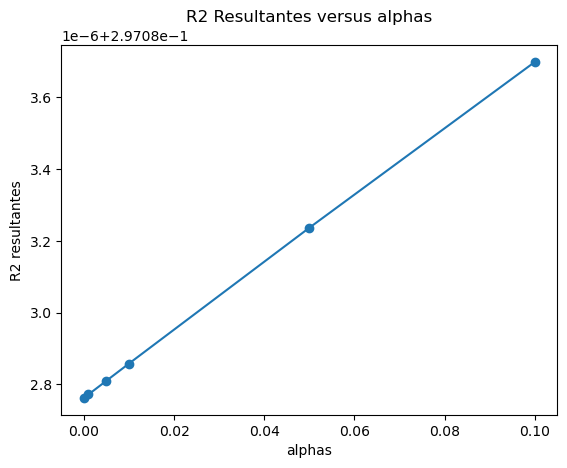

In [17]:
r2_resultantes = []

for alpha in alphas:
    ridge_model=Ridge(alpha=alpha)
    ridge_model.fit(X_train,y_train)

    y_pred=ridge_model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    r2_resultantes.append(r2)
    print(f"Valor de R2 para alpha igual a {alpha} : {r2}")

plt.plot(alphas,r2_resultantes,marker='o',linestyle='-')
plt.title("R2 Resultantes versus alphas")
plt.xlabel("alphas")
plt.ylabel("R2 resultantes")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.041e+11, tolerance: 8.060e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

Valor de R2 para alpha igual a 0 : 0.29708276217912755
Valor de R2 para alpha igual a 0.001 : 0.29708274387075284
Valor de R2 para alpha igual a 0.005 : 0.29708266915475445
Valor de R2 para alpha igual a 0.01 : 0.2970825723216154
Valor de R2 para alpha igual a 0.05 : 0.2970816619973493
Valor de R2 para alpha igual a 0.1 : 0.29708018424849436


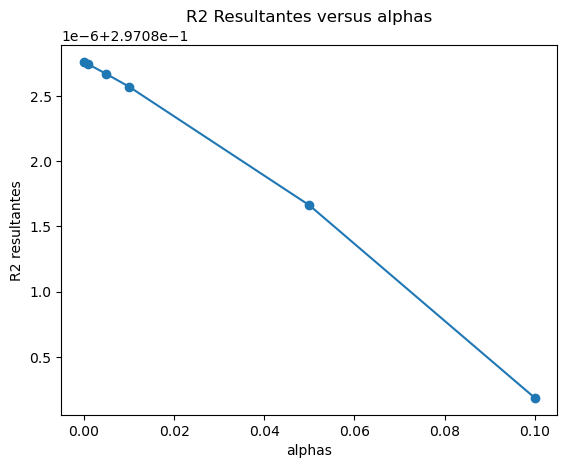

In [18]:
r2_resultantes_lasso = []

for alpha in alphas:
    lasso_model=Lasso(alpha=alpha)
    lasso_model.fit(X_train,y_train)

    y_pred=lasso_model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    r2_resultantes_lasso.append(r2)
    print(f"Valor de R2 para alpha igual a {alpha} : {r2}")

plt.plot(alphas,r2_resultantes_lasso,marker='o',linestyle='-')
plt.title("R2 Resultantes versus alphas")
plt.xlabel("alphas")
plt.ylabel("R2 resultantes")
plt.show()

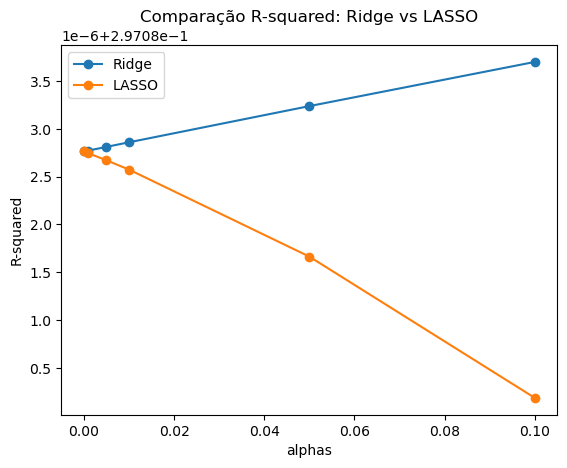

In [19]:
plt.plot(alphas, r2_resultantes, marker='o', linestyle='-', label='Ridge')
plt.plot(alphas, r2_resultantes_lasso, marker='o', linestyle='-', label='LASSO')
plt.title("Comparação R-squared: Ridge vs LASSO")
plt.xlabel("alphas")
plt.ylabel("R-squared")
plt.legend()
plt.show()

A partir do uso das variaveis restantes advindos do uso do metodo stepwise, podemos perceber que o R2 aumenta com o aumento de alpha para o metodo Ridge e reduz para o metodo Lasso. Porem considerando que uma reducao na quantidade de variaveis evita o overfitting do modelo, podemos considerar que o metodo Ridge deve ser a melhor abordagem para o caso em que o stepwise eh utilizado para reduzir o numero de variaveis e a partir das variaveis resultantes aplicamos a regularizacao citada.

In [52]:
modelo = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia'
y, X = patsy.dmatrices(modelo, data=df, return_type='dataframe')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
result = stepwise_selection(X_train, y_train)

model = sm.OLS(y_train, sm.add_constant(X_train[result])).fit()

y_pred = model.predict(sm.add_constant(X_test[result]))
r2 = r2_score(y_test, y_pred)
print(f'R² na base de testes: {r2}')

Add  tempo_emprego                  with p-value 0.0
Add  Intercept                      with p-value 0.0
Add  C(sexo)[T.M]                   with p-value 0.0
Add  C(tipo_renda)[T.Empresário]    with p-value 1.00677e-20
Add  C(educacao)[T.Superior completo] with p-value 7.74216e-13
Add  idade                          with p-value 7.79639e-11
Add  posse_de_imovel[T.True]        with p-value 4.04926e-09
Add  qtd_filhos                     with p-value 0.00273949
R² na base de testes: 0.3644307444048809


Considerando agora o uso do modelo em que aplicamos o log da renda em vez da renda sozinha, temos um melhor ajuste para o caso do uso de stepwise, com R@ igual a 0.3644307444048809 e o aumento de uma variavel a ser utilizada, que eh posse_de_imovel e qtd_filhos.

In [56]:
modelo = 'np.log(renda) ~ C(sexo) + C(tipo_renda) + C(educacao) + idade + tempo_emprego + posse_de_imovel + qtd_filhos'
y, X = patsy.dmatrices(modelo, data=df, return_type='dataframe')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Valor de R2 para alpha igual a 0 : 0.36466564769638155
Valor de R2 para alpha igual a 0.001 : 0.3646656607461214
Valor de R2 para alpha igual a 0.005 : 0.3646657128645657
Valor de R2 para alpha igual a 0.01 : 0.36466577783183873
Valor de R2 para alpha igual a 0.05 : 0.3646662904121022
Valor de R2 para alpha igual a 0.1 : 0.36466691359167414


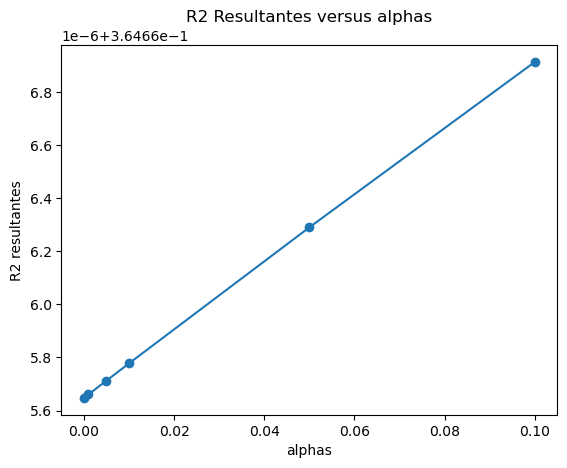

In [58]:
r2_resultantes = []

for alpha in alphas:
    ridge_model=Ridge(alpha=alpha)
    ridge_model.fit(X_train,y_train)

    y_pred=ridge_model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    r2_resultantes.append(r2)
    print(f"Valor de R2 para alpha igual a {alpha} : {r2}")

plt.plot(alphas,r2_resultantes,marker='o',linestyle='-')
plt.title("R2 Resultantes versus alphas")
plt.xlabel("alphas")
plt.ylabel("R2 resultantes")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.434e+03, tolerance: 7.522e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

Valor de R2 para alpha igual a 0 : 0.3646656476963813
Valor de R2 para alpha igual a 0.001 : 0.36468589588432854
Valor de R2 para alpha igual a 0.005 : 0.36436310292113183
Valor de R2 para alpha igual a 0.01 : 0.3629918049010108
Valor de R2 para alpha igual a 0.05 : 0.3373704242761929
Valor de R2 para alpha igual a 0.1 : 0.29068131048627244


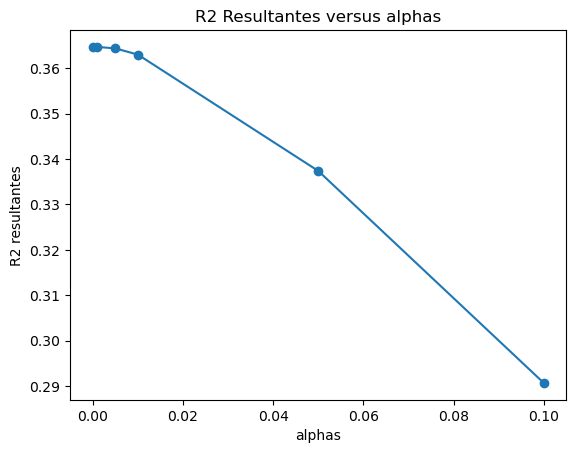

In [60]:
r2_resultantes_lasso = []

for alpha in alphas:
    lasso_model=Lasso(alpha=alpha)
    lasso_model.fit(X_train,y_train)

    y_pred=lasso_model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    r2_resultantes_lasso.append(r2)
    print(f"Valor de R2 para alpha igual a {alpha} : {r2}")

plt.plot(alphas,r2_resultantes_lasso,marker='o',linestyle='-')
plt.title("R2 Resultantes versus alphas")
plt.xlabel("alphas")
plt.ylabel("R2 resultantes")
plt.show()

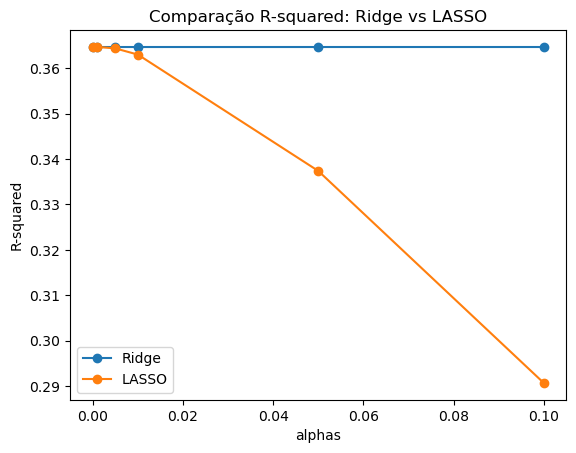

In [62]:
plt.plot(alphas, r2_resultantes, marker='o', linestyle='-', label='Ridge')
plt.plot(alphas, r2_resultantes_lasso, marker='o', linestyle='-', label='LASSO')
plt.title("Comparação R-squared: Ridge vs LASSO")
plt.xlabel("alphas")
plt.ylabel("R-squared")
plt.legend()
plt.show()

Agora, ao utilizarmos o log de renda em vez da renda linear, observamos uma melhora significativa no modelo, partindo de pouco menos de 0.3 para valores acima de 0.36, porem com o metodo Ridge de regularizaca ainda se demonstrando uma melhor abordagem para o caso de menos variaveis. Comparando entao o valor de R2 para stepwise igual a 0.3644307444048809 com o melhor valor para o metodo Ridge, igual a 0.36466691359167414, vemos que o Ridge pode fazer uso do stepwise como ponto de partida para a remocao das variaveis e apresentar um valor de R2 melhor do que este ultimo metodo.

In [65]:
modelo = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia'
y, X = patsy.dmatrices(modelo, data=df, return_type='dataframe')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Valor de R2 para alpha igual a 0 : 0.36448580517136875
Valor de R2 para alpha igual a 0.001 : 0.36448593654290407
Valor de R2 para alpha igual a 0.005 : 0.3644864617184165
Valor de R2 para alpha igual a 0.01 : 0.36448711748985163
Valor de R2 para alpha igual a 0.05 : 0.36449233593063146
Valor de R2 para alpha igual a 0.1 : 0.3644987905505891


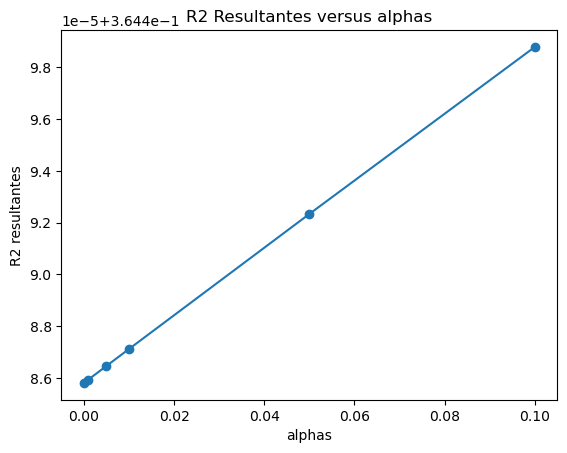

In [67]:
r2_resultantes = []

for alpha in alphas:
    ridge_model=Ridge(alpha=alpha)
    ridge_model.fit(X_train,y_train)

    y_pred=ridge_model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    r2_resultantes.append(r2)
    print(f"Valor de R2 para alpha igual a {alpha} : {r2}")

plt.plot(alphas,r2_resultantes,marker='o',linestyle='-')
plt.title("R2 Resultantes versus alphas")
plt.xlabel("alphas")
plt.ylabel("R2 resultantes")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.428e+03, tolerance: 7.522e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

Valor de R2 para alpha igual a 0 : 0.36448677518970685
Valor de R2 para alpha igual a 0.001 : 0.3656473655112237
Valor de R2 para alpha igual a 0.005 : 0.3650622487768106
Valor de R2 para alpha igual a 0.01 : 0.3631418177298792
Valor de R2 para alpha igual a 0.05 : 0.33737041908171617
Valor de R2 para alpha igual a 0.1 : 0.29068131048627244


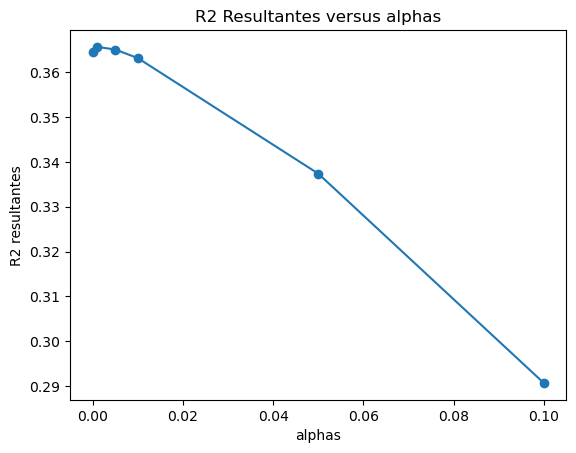

In [69]:
r2_resultantes_lasso = []

for alpha in alphas:
    lasso_model=Lasso(alpha=alpha)
    lasso_model.fit(X_train,y_train)

    y_pred=lasso_model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    r2_resultantes_lasso.append(r2)
    print(f"Valor de R2 para alpha igual a {alpha} : {r2}")

plt.plot(alphas,r2_resultantes_lasso,marker='o',linestyle='-')
plt.title("R2 Resultantes versus alphas")
plt.xlabel("alphas")
plt.ylabel("R2 resultantes")
plt.show()

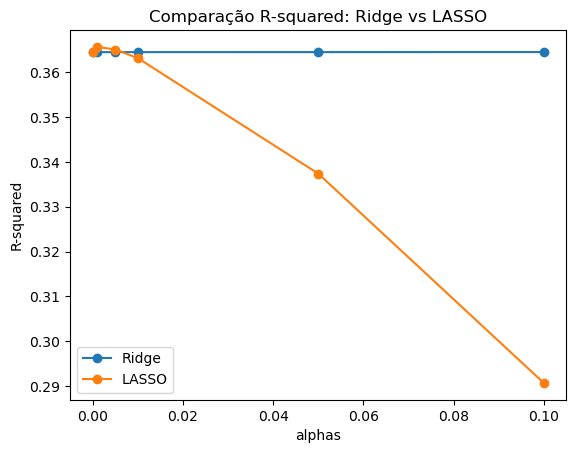

In [71]:
plt.plot(alphas, r2_resultantes, marker='o', linestyle='-', label='Ridge')
plt.plot(alphas, r2_resultantes_lasso, marker='o', linestyle='-', label='LASSO')
plt.title("Comparação R-squared: Ridge vs LASSO")
plt.xlabel("alphas")
plt.ylabel("R-squared")
plt.legend()
plt.show()

Agora, ao utilizarmos todas as variaveis no modelo e aplicarmos Ridge e Lasso, temos que o ajuste para o log de renda nos retorna como melhor valor o maximo de Lasso, igual a 0.3656473655112237 com alpha igual a 0.001.

In [96]:
for i in range(1,11):
    regr = DecisionTreeRegressor(max_depth=i)
    regr.fit(X_train,y_train)
    mse = regr.score(X_test,y_test)
    template = "O MSE da arvore com profundidade={0} eh: {i:.16f}"
    print(template.format(regr_1.get_depth(),mse).replace(".",","))

KeyError: 'i'

Utilizando a base de dados com o maior valor de R2 encontrado por regularizacao para uma arvore, e aplicando diferentes profundidades, encontramos o melhor valor de R2 igual a 